In [74]:
# Brian Behnke
# 12/6/2022
# Internet Engineering - CS-45231
#
# Modified version of a notebook written by somesh636:
# https://github.com/somesh636/DDoS_CyberThreat_Detection_AI_ML_Algorithms/blob/master/DDoS_ML_AI_TTSData_2.ipynb
# Used to verify process and learn about data processing techniques

import pandas as pd
import numpy as np
import os
import pickle

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection   import train_test_split
from sklearn.metrics           import accuracy_score
from sklearn.metrics           import classification_report
from sklearn.metrics           import confusion_matrix
from sklearn.preprocessing     import LabelEncoder
from sklearn.preprocessing     import StandardScaler
from sklearn.tree              import ExtraTreeClassifier
from sklearn.tree              import DecisionTreeClassifier
from sklearn.linear_model      import LogisticRegression
from sklearn.naive_bayes       import GaussianNB

In [75]:
df = pd.read_csv('data/CICDDoS2019_Consolidated.csv')
df.shape

C:\Users\Brian\AppData\Local\Temp\ipykernel_17960\2680276053.py:1: DtypeWarning: Columns (1,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/CICDDoS2019_Consolidated.csv')


(488935, 89)

In [76]:
df.dropna(axis=0, inplace=True)
df.isnull().sum().sum()

0

In [77]:
df[' Label'].value_counts()

MSSQL      139587
Syn        114076
UDP         94715
NetBIOS     87933
LDAP        46774
Portmap      4444
BENIGN       1351
UDPLag         49
Name:  Label, dtype: int64

In [78]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 

In [79]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [80]:
df_x = df.drop([' Label', 'SimillarHTTP'], axis=1)
df_y = df[' Label']

df_y.unique()

array(['LDAP', 'NetBIOS', 'BENIGN', 'MSSQL', 'Portmap', 'Syn', 'UDP',
       'UDPLag'], dtype=object)

In [81]:
le = LabelEncoder()
df_y_trans = le.fit_transform(df_y)

le_fid = LabelEncoder()
le_fid.fit(df_x['Flow ID'])
df_x['Flow ID'] = le_fid.fit_transform(df_x['Flow ID'])

le_sip = LabelEncoder()
le_sip.fit(df_x[' Source IP'])
df_x[' Source IP'] = le_sip.fit_transform(df_x[' Source IP'])

le_dip = LabelEncoder()
le_dip.fit(df_x[' Destination IP'])
df_x[' Destination IP'] = le_dip.fit_transform(df_x[' Destination IP'])

le_t = LabelEncoder()
le_t.fit(df_x[' Timestamp'])
df_x[' Timestamp'] = le_t.fit_transform(df_x[' Timestamp'])

In [82]:
df_x

Flow ID   Source IP  Source Port   Destination IP  Destination Port  \
0        223278          27          520              146             22993   
1        409387          27          755              146              3377   
2        412964          27          768              146             33027   
3        394443          27          700              146             60924   
4        316746          27          615              146             23073   
...         ...         ...          ...              ...               ...   
488930   440433          27         8673              146             33165   
488931     9570          27        11130              146             20694   
488932   483527          93        54686              226                53   
488933   250498          27        54809              146             19261   
488934   341671          27        62506              146             60637   

        Protocol   Timestamp  Flow Duration  Total Fwd Packets  \
0             17      111250              1                  2   
1             17      122409              1                  2   
2             17      130751              1                  2   
3             17      112057              2                  2   
4             17      135028              1                  2   
...          ...         ...            ...                ...   
488930         6      381200              1                  2   
488931         6      376363            119                  2   
488932        17      373944          20807                  2   
488933         6      382272             49                  2   
488934         6      381052              1                  2   

        Total Backward Packets  ...  min_seg_size_forward Active Mean  \
0                            0  ...                    32         0.0   
1                            0  ...                     0         0.0   
2                            0  ...                     0         0.0   
3                            0  ...                     0         0.0   
4                            0  ...                     8         0.0   
...                        ...  ...                   ...         ...   
488930                       0  ...                    20         0.0   
488931                       2  ...                    20         0.0   
488932                       2  ...                    20         0.0   
488933                       0  ...                    20         0.0   
488934                       0  ...                    20         0.0   

        Active Std  Active Max  Active Min Idle Mean  Idle Std  Idle Max  \
0              0.0         0.0         0.0       0.0       0.0       0.0   
1              0.0         0.0         0.0       0.0       0.0       0.0   
2              0.0         0.0         0.0       0.0       0.0       0.0   
3              0.0         0.0         0.0       0.0       0.0       0.0   
4              0.0         0.0         0.0       0.0       0.0       0.0   
...            ...         ...         ...       ...       ...       ...   
488930         0.0         0.0         0.0       0.0       0.0       0.0   
488931         0.0         0.0         0.0       0.0       0.0       0.0   
488932         0.0         0.0         0.0       0.0       0.0       0.0   
488933         0.0         0.0         0.0       0.0       0.0       0.0   
488934         0.0         0.0         0.0       0.0       0.0       0.0   

        Idle Min  Inbound  
0            0.0        1  
1            0.0        1  
2            0.0        1  
3            0.0        1  
4            0.0        1  
...          ...      ...  
488930       0.0        1  
488931       0.0        1  
488932       0.0        0  
488933       0.0        1  
488934       0.0        1  

[488929 rows x 85 columns]

In [83]:
model = ExtraTreeClassifier()
model.fit(df_x, df_y_trans)

ExtraTreeClassifier()

<AxesSubplot: title={'center': 'Feature Selection using ExtraTreeClassifier'}>

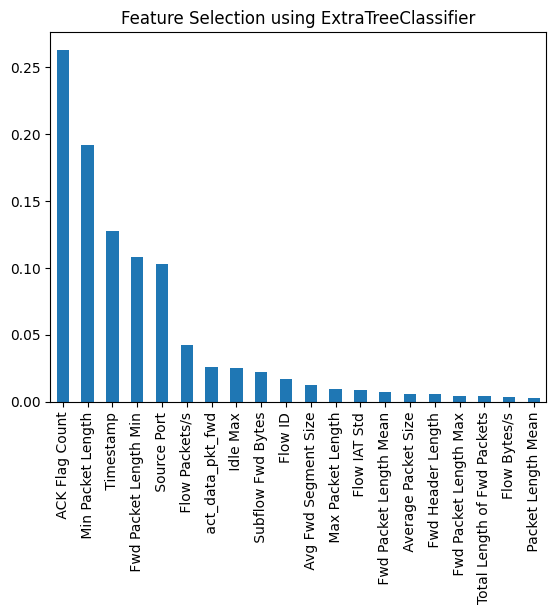

In [84]:
feature_importance_std = pd.Series(model.feature_importances_, index=df_x.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Feature Selection using ExtraTreeClassifier')

In [85]:
df_top20_x = df_x[[' Average Packet Size',
                   ' ACK Flag Count',
                   ' Fwd Packet Length Max',
                   ' Max Packet Length',
                   ' Fwd Packet Length Min',
                   ' Source Port',
                   ' Timestamp',
                   ' Fwd IAT Mean',
                   ' Bwd IAT Mean',
                   'Flow ID',
                   ' Packet Length Mean',
                   ' Fwd Header Length',
                   ' Min Packet Length',
                   ' Avg Fwd Segment Size',
                   ' Subflow Fwd Bytes',
                   'Flow Bytes/s',
                   ' Protocol',
                   ' Fwd Header Length.1',
                   ' Destination Port',
                   ' Fwd Packet Length Mean']]

df_top20_x

Average Packet Size  ACK Flag Count  Fwd Packet Length Max  \
0                    2208.0               0                 1472.0   
1                    2208.0               0                 1472.0   
2                    2208.0               0                 1472.0   
3                    2208.0               0                 1472.0   
4                    2208.0               0                 1472.0   
...                     ...             ...                    ...   
488930                  9.0               1                    6.0   
488931                  7.5               1                    6.0   
488932                62.75               0                   31.0   
488933                  9.0               1                    6.0   
488934                  9.0               1                    6.0   

        Max Packet Length  Fwd Packet Length Min  Source Port   Timestamp  \
0                  1472.0                 1472.0          520      111250   
1                  1472.0                 1472.0          755      122409   
2                  1472.0                 1472.0          768      130751   
3                  1472.0                 1472.0          700      112057   
4                  1472.0                 1472.0          615      135028   
...                   ...                    ...          ...         ...   
488930                6.0                    6.0         8673      381200   
488931                6.0                    6.0        11130      376363   
488932               79.0                   31.0        54686      373944   
488933                6.0                    6.0        54809      382272   
488934                6.0                    6.0        62506      381052   

        Fwd IAT Mean  Bwd IAT Mean  Flow ID  Packet Length Mean  \
0                1.0           0.0   223278              1472.0   
1                1.0           0.0   409387              1472.0   
2                1.0           0.0   412964              1472.0   
3                2.0           0.0   394443              1472.0   
4                1.0           0.0   316746              1472.0   
...              ...           ...      ...                 ...   
488930           1.0           0.0   440433                 6.0   
488931           1.0           1.0     9570                 6.0   
488932           3.0           3.0   483527                50.2   
488933          49.0           0.0   250498                 6.0   
488934           1.0           0.0   341671                 6.0   

        Fwd Header Length  Min Packet Length  Avg Fwd Segment Size  \
0                      64             1472.0                1472.0   
1                       0             1472.0                1472.0   
2                       0             1472.0                1472.0   
3                       0             1472.0                1472.0   
4                      16             1472.0                1472.0   
...                   ...                ...                   ...   
488930                 40                6.0                   6.0   
488931                 40                6.0                   6.0   
488932                 40               31.0                  31.0   
488933                 40                6.0                   6.0   
488934                 40                6.0                   6.0   

        Subflow Fwd Bytes   Flow Bytes/s  Protocol  Fwd Header Length.1  \
0                    2944   2944000000.0        17                   64   
1                    2944   2944000000.0        17                    0   
2                    2944   2944000000.0        17                    0   
3                    2944   1472000000.0        17                    0   
4                    2944   2944000000.0        17                   16   
...                   ...            ...       ...                  ...   
488930                 12     12000000.0         6                   40

In [86]:
df_y_trans

array([1, 1, 1, ..., 0, 5, 5])

In [87]:
x_train, x_test, y_train, y_test = train_test_split(df_top20_x,
                                                    df_y_trans,
                                                    test_size=0.3)

In [88]:
x_train.shape

(342250, 20)

In [89]:
y_train.shape

(342250,)

In [90]:
x_test.shape

(146679, 20)

In [91]:
y_test.shape

(146679,)

In [92]:
ss = StandardScaler()
x_train_std = ss.fit_transform(x_train)
x_test_std = ss.fit_transform(x_test)

In [93]:
dt = DecisionTreeClassifier()
dt.fit(x_train_std, y_train)

DecisionTreeClassifier()

In [94]:
dt_y_prediction = dt.predict(x_test_std)
print('Classification Report for DT: \n', classification_report(le.inverse_transform(y_test), le.inverse_transform(dt_y_prediction)))

Classification Report for DT: 
               precision    recall  f1-score   support

      BENIGN       0.99      0.90      0.94       411
        LDAP       0.98      0.99      0.99     14085
       MSSQL       1.00      1.00      1.00     41833
     NetBIOS       0.99      0.99      0.99     26571
     Portmap       0.99      0.79      0.88      1324
         Syn       1.00      1.00      1.00     34168
         UDP       1.00      1.00      1.00     28274
      UDPLag       0.29      0.92      0.44        13

    accuracy                           0.99    146679
   macro avg       0.90      0.95      0.90    146679
weighted avg       0.99      0.99      0.99    146679



In [95]:
print('pred | real')
for i in range(len(dt_y_prediction)):
    print(f'{dt_y_prediction[i]} | {y_test[i]}')

pred | real
3 | 3
3 | 3
2 | 2
1 | 1
2 | 2
2 | 2
4 | 4
6 | 6
1 | 1
6 | 6
5 | 5
6 | 6
5 | 5
2 | 2
5 | 5
6 | 6
2 | 2
2 | 2
2 | 2
1 | 1
2 | 2
6 | 6
6 | 6
2 | 2
5 | 5
3 | 3
2 | 2
2 | 2
5 | 5
3 | 3
2 | 2
2 | 2
2 | 2
2 | 2
2 | 2
3 | 3
2 | 2
6 | 6
5 | 5
6 | 6
6 | 6
2 | 2
5 | 5
5 | 5
2 | 2
1 | 1
3 | 3
5 | 5
2 | 2
1 | 1
5 | 5
6 | 6
3 | 3
3 | 3
6 | 6
5 | 5
6 | 6
6 | 6
3 | 3
2 | 2
3 | 3
5 | 5
1 | 1
1 | 1
5 | 5
3 | 3
5 | 5
6 | 6
5 | 5
3 | 3
3 | 3
1 | 1
5 | 5
2 | 2
5 | 5
6 | 6
6 | 6
3 | 3
2 | 2
3 | 3
1 | 1
6 | 6
2 | 2
1 | 1
5 | 5
2 | 2
5 | 5
6 | 6
5 | 5
2 | 2
1 | 1
1 | 1
2 | 2
2 | 2
1 | 1
6 | 6
2 | 2
6 | 6
6 | 6
2 | 2
5 | 5
3 | 3
2 | 2
6 | 6
5 | 5
2 | 2
5 | 5
2 | 2
2 | 2
2 | 2
3 | 3
2 | 2
5 | 5
5 | 5
3 | 3
3 | 3
3 | 4
1 | 1
5 | 5
5 | 5
5 | 5
2 | 2
6 | 6
2 | 2
3 | 3
3 | 3
2 | 2
3 | 3
2 | 2
2 | 1
3 | 3
6 | 6
3 | 3
5 | 5
3 | 3
6 | 6
1 | 1
1 | 1
2 | 2
1 | 1
2 | 2
2 | 2
6 | 6
3 | 3
2 | 2
2 | 2
2 | 2
2 | 2
5 | 5
5 | 5
3 | 3
2 | 2
2 | 2
2 | 2
5 | 5
2 | 2
6 | 6
6 | 6
2 | 2
3 | 3
6 | 6
3 | 3
1 | 1
1 | 1
1 | 

In [96]:
dt_confusion_matrix = confusion_matrix(y_test, dt_y_prediction)
print('Decision Tree Confusion Matrix: \n', dt_confusion_matrix)

Decision Tree Confusion Matrix: 
 [[  370     1     0     3    11    26     0     0]
 [    0 13887   198     0     0     0     0     0]
 [    0     0 41740     0     0     0    93     0]
 [    0   219     0 26352     0     0     0     0]
 [    0     0     0   276  1048     0     0     0]
 [    2     0     0     0     0 34166     0     0]
 [    1     0     0     0     0     0 28243    30]
 [    0     0     0     0     0     1     0    12]]


In [97]:
ac_score_dt = accuracy_score(y_test, dt_y_prediction)
print("Accuracy Score for DT: \n", ac_score_dt * 100)

Accuracy Score for DT: 
 99.41300390648968


In [98]:
with open('dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

In [99]:
nb = GaussianNB()
nb.fit(x_train_std, y_train)
nb_y_prediction = nb.predict(x_test_std)
nb_y_prediction.shape

(146679,)

In [100]:
print('pred | real')
for i in range(len(nb_y_prediction)):
    print(f'{nb_y_prediction[i]} | {y_test[i]}')

pred | real
3 | 3
3 | 3
2 | 2
1 | 1
2 | 2
2 | 2
3 | 4
2 | 6
1 | 1
2 | 6
0 | 5
2 | 6
0 | 5
2 | 2
0 | 5
2 | 6
2 | 2
2 | 2
2 | 2
1 | 1
2 | 2
2 | 6
2 | 6
2 | 2
0 | 5
3 | 3
2 | 2
2 | 2
0 | 5
3 | 3
2 | 2
2 | 2
2 | 2
2 | 2
2 | 2
3 | 3
2 | 2
2 | 6
0 | 5
2 | 6
2 | 6
2 | 2
0 | 5
0 | 5
2 | 2
1 | 1
3 | 3
0 | 5
2 | 2
1 | 1
0 | 5
2 | 6
3 | 3
3 | 3
2 | 6
0 | 5
2 | 6
2 | 6
3 | 3
2 | 2
3 | 3
0 | 5
1 | 1
1 | 1
0 | 5
3 | 3
0 | 5
2 | 6
0 | 5
3 | 3
3 | 3
1 | 1
0 | 5
2 | 2
0 | 5
2 | 6
2 | 6
3 | 3
2 | 2
3 | 3
1 | 1
2 | 6
2 | 2
1 | 1
0 | 5
2 | 2
0 | 5
2 | 6
0 | 5
2 | 2
1 | 1
1 | 1
2 | 2
2 | 2
1 | 1
2 | 6
2 | 2
2 | 6
2 | 6
2 | 2
0 | 5
3 | 3
2 | 2
2 | 6
0 | 5
2 | 2
0 | 5
2 | 2
2 | 2
2 | 2
3 | 3
2 | 2
0 | 5
0 | 5
3 | 3
3 | 3
3 | 4
1 | 1
0 | 5
0 | 5
0 | 5
2 | 2
2 | 6
2 | 2
3 | 3
3 | 3
2 | 2
3 | 3
2 | 2
1 | 1
3 | 3
2 | 6
3 | 3
0 | 5
3 | 3
2 | 6
1 | 1
1 | 1
2 | 2
1 | 1
2 | 2
2 | 2
2 | 6
3 | 3
2 | 2
2 | 2
2 | 2
2 | 2
0 | 5
0 | 5
3 | 3
2 | 2
2 | 2
2 | 2
0 | 5
2 | 2
2 | 6
2 | 6
2 | 2
3 | 3
2 | 6
3 | 3
1 | 1
1 | 1
1 | 

In [101]:
print('Classification Report for NB: \n', classification_report(le.inverse_transform(y_test), le.inverse_transform(nb_y_prediction), zero_division=1))

Classification Report for NB: 
               precision    recall  f1-score   support

      BENIGN       0.01      1.00      0.02       411
        LDAP       0.99      0.99      0.99     14085
       MSSQL       0.59      1.00      0.74     41833
     NetBIOS       0.95      0.99      0.97     26571
     Portmap       1.00      0.00      0.00      1324
         Syn       1.00      0.00      0.00     34168
         UDP       1.00      0.00      0.00     28274
      UDPLag       1.00      0.00      0.00        13

    accuracy                           0.56    146679
   macro avg       0.82      0.50      0.34    146679
weighted avg       0.87      0.56      0.48    146679



In [102]:
nb_confusion_matrix = confusion_matrix(y_test, nb_y_prediction)
print('Naive Bayes Confusion Matrix: \n', nb_confusion_matrix)

Naive Bayes Confusion Matrix: 
 [[  410     0     1     0     0     0     0     0]
 [    3 13957   124     1     0     0     0     0]
 [   13   117 41703     0     0     0     0     0]
 [   33     0   240 26298     0     0     0     0]
 [    4     0    21  1299     0     0     0     0]
 [34135     0    33     0     0     0     0     0]
 [    4     0 28270     0     0     0     0     0]
 [    1     0    12     0     0     0     0     0]]


In [103]:
ac_score_nb = accuracy_score(y_test, nb_y_prediction)
print('Accuracy Score for NB: \n', ac_score_nb * 100)

Accuracy Score for NB: 
 56.1552778516352


In [104]:
with open('nb_model.pkl', 'wb') as file:
    pickle.dump(nb, file)

In [105]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train_std, y_train)

LogisticRegression(max_iter=10000)

In [106]:
lr_y_prediction = lr.predict(x_test_std)
print('Classification Report for LR: \n', classification_report(le.inverse_transform(y_test), le.inverse_transform(lr_y_prediction), zero_division=1))

Classification Report for LR: 
               precision    recall  f1-score   support

      BENIGN       0.95      0.93      0.94       411
        LDAP       1.00      1.00      1.00     14085
       MSSQL       1.00      1.00      1.00     41833
     NetBIOS       0.98      1.00      0.99     26571
     Portmap       0.99      0.56      0.72      1324
         Syn       1.00      1.00      1.00     34168
         UDP       1.00      1.00      1.00     28274
      UDPLag       0.00      0.00      0.00        13

    accuracy                           0.99    146679
   macro avg       0.86      0.81      0.83    146679
weighted avg       0.99      0.99      0.99    146679



In [107]:
print('pred | real')
for i in range(len(lr_y_prediction)):
    print(f'{lr_y_prediction[i]} | {y_test[i]}')

pred | real
3 | 3
3 | 3
2 | 2
1 | 1
2 | 2
2 | 2
3 | 4
6 | 6
1 | 1
6 | 6
5 | 5
6 | 6
5 | 5
2 | 2
5 | 5
6 | 6
2 | 2
2 | 2
2 | 2
1 | 1
2 | 2
6 | 6
6 | 6
2 | 2
5 | 5
3 | 3
2 | 2
2 | 2
5 | 5
3 | 3
2 | 2
2 | 2
2 | 2
2 | 2
2 | 2
3 | 3
2 | 2
6 | 6
5 | 5
6 | 6
6 | 6
2 | 2
5 | 5
5 | 5
2 | 2
1 | 1
3 | 3
5 | 5
2 | 2
1 | 1
5 | 5
6 | 6
3 | 3
3 | 3
6 | 6
5 | 5
6 | 6
6 | 6
3 | 3
2 | 2
3 | 3
5 | 5
1 | 1
1 | 1
5 | 5
3 | 3
5 | 5
6 | 6
5 | 5
3 | 3
3 | 3
1 | 1
5 | 5
2 | 2
5 | 5
6 | 6
6 | 6
3 | 3
2 | 2
3 | 3
1 | 1
6 | 6
2 | 2
1 | 1
5 | 5
2 | 2
5 | 5
6 | 6
5 | 5
2 | 2
1 | 1
1 | 1
2 | 2
2 | 2
1 | 1
6 | 6
2 | 2
6 | 6
6 | 6
2 | 2
5 | 5
3 | 3
2 | 2
6 | 6
5 | 5
2 | 2
5 | 5
2 | 2
2 | 2
2 | 2
3 | 3
2 | 2
5 | 5
5 | 5
3 | 3
3 | 3
3 | 4
1 | 1
5 | 5
5 | 5
5 | 5
2 | 2
6 | 6
2 | 2
3 | 3
3 | 3
2 | 2
3 | 3
2 | 2
1 | 1
3 | 3
6 | 6
3 | 3
5 | 5
3 | 3
6 | 6
1 | 1
1 | 1
2 | 2
1 | 1
2 | 2
2 | 2
6 | 6
3 | 3
2 | 2
2 | 2
2 | 2
2 | 2
5 | 5
5 | 5
3 | 3
2 | 2
2 | 2
2 | 2
5 | 5
2 | 2
6 | 6
6 | 6
2 | 2
3 | 3
6 | 6
3 | 3
1 | 1
1 | 1
1 | 

In [108]:
ac_score_lr = accuracy_score(y_test, lr_y_prediction)
print('Accuracy Score for LR: \n', ac_score_lr * 100)

Accuracy Score for LR: 
 99.3680076902624


In [109]:
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)